## Machine Learning Model to Predict Startup Status

In [1]:
import pandas as pd

In [10]:
# show *all* rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# widen the “page” so it won’t wrap columns  
pd.set_option('display.width', 1000)

In [5]:
startups = pd.read_csv("./webscraping/data/startup_df.csv")

startups.head(3)

,name,link_startupeu,link_logo,link_website,website_up,city,region,category,top_3_keywords,business_model,...,headline_acquisition_count,headline_bankruptcy_count,headline_non_financial_count,description_writing_score,description_market_readiness_score,description_founder_signal_score,description_word_count,description_jargon_density,description_numeric_evidence_count,status
0,Avdain,https://www.eu-startups.com/directory/avdain/,https://www.eu-startups.com/wp-content/uploads...,avdain.com,True,Vienna,Vienna,Software & Analytics,"['innovation', 'academic', 'entrepreneurial']",B2B,...,0,0,0,8,6,8,290,0.25,0,no_funding
1,SurveySensum,https://www.eu-startups.com/directory/surveyse...,https://www.eu-startups.com/wp-content/uploads...,surveysensum.com,True,vienna,Vienna,Software & Analytics,"['customer feedback', 'CX', 'business goals']",B2B,...,0,0,0,8,8,6,203,0.20,0,no_funding
2,Artypa,https://www.eu-startups.com/directory/artypa/,https://www.eu-startups.com/wp-content/uploads...,artypa.com,True,Vienna,Vienna,Software & Analytics,"['AI', 'platform', 'efficiency']",B2B,...,0,0,0,8,6,5,335,0.20,0,no_funding


In [6]:
for col in startups.columns:
    print(col)

name
link_startupeu
link_logo
link_website
website_up
city
region
category
top_3_keywords
business_model
linkedin_global_profile
linkedin_handle
linkedin_valid
instagram_handle
instagram_valid
x_handle
x_valid
founded_year
age
total_funding_listing
headline_count
headlines
headline_financial_count
headline_funding
headline_acquisition_count
headline_bankruptcy_count
headline_non_financial_count
description_writing_score
description_market_readiness_score
description_founder_signal_score
description_word_count
description_jargon_density
description_numeric_evidence_count
status


**Drop irrelevant columns**

In [8]:
keep_cols = [
    "name",
    "link_startupeu",
    "link_website",
    "city",
    "region",
    "category",
    "top_3_keywords",
    "business_model",
    "linkedin_global_profile",
    "linkedin_valid",
    "instagram_valid",
    "x_valid",
    "age",
    "total_funding_listing",
    "headline_non_financial_count",
    "description_writing_score",
    "description_market_readiness_score",
    "description_founder_signal_score",
    "description_word_count",
    "description_jargon_density",
    "description_numeric_evidence_count",
    "status"
]

# Subset your DataFrame (named `listing`) to only these columns
df_final = startups[keep_cols].copy()

In [11]:
top10_data = {}

for col in df_final.columns:
    # include NaNs, then take the top 10
    vc = df_final[col] \
         .value_counts(dropna=False) \
         .head(10)

    # (optional) relabel the NaN index to "<Missing>"
    vc.index = vc.index.where(~vc.index.isna(), '<Missing>')

    top_values = vc.index.tolist()
    top_counts = vc.values.tolist()

    top10_data[col]       = pd.Series(top_values)
    top10_data[f"{col}_count"] = pd.Series(top_counts)

top10_df = pd.DataFrame(top10_data)

display(top10_df)

,name,name_count,link_startupeu,link_startupeu_count,link_website,link_website_count,city,city_count,region,region_count,category,category_count,top_3_keywords,top_3_keywords_count,business_model,business_model_count,linkedin_global_profile,linkedin_global_profile_count,linkedin_valid,linkedin_valid_count,instagram_valid,instagram_valid_count,x_valid,x_valid_count,age,age_count,total_funding_listing,total_funding_listing_count,headline_non_financial_count,headline_non_financial_count_count,description_writing_score,description_writing_score_count,description_market_readiness_score,description_market_readiness_score_count,description_founder_signal_score,description_founder_signal_score_count,description_word_count,description_word_count_count,description_jargon_density,description_jargon_density_count,description_numeric_evidence_count,description_numeric_evidence_count_count,status,status_count
0,Ubiq.ai,1,https://www.eu-startups.com/directory/ubiq-ai/,1,<Missing>,62,Vienna,231,Vienna,246.0,Software & Analytics,194,"['Machine Learning', 'retail', 'demand forecas...",2,B2B,245.0,False,374.0,True,271.0,True,232.0,False,242.0,5,102,No funding announced yet,296.0,0.0,216.0,7.0,240.0,6.0,155.0,5.0,157.0,56,42,0.25,171,0.0,305.0,no_funding,215.0
1,Avdain,1,https://www.eu-startups.com/directory/avdain/,1,leftshiftone.com,1,Linz,33,Upper Austria,52.0,Professional Services,45,"['AI', 'platform', 'efficiency']",1,B2C,100.0,True,14.0,False,117.0,False,156.0,True,146.0,6,99,Between €1 million-€ 2.5 million,27.0,1.0,74.0,8.0,98.0,5.0,131.0,6.0,120.0,66,37,0.20,82,1.0,62.0,funding,111.0
2,SurveySensum,1,https://www.eu-startups.com/directory/surveyse...,1,dai.ki,1,Graz,23,Styria,29.0,Health,42,"['headless CMS', 'content experiences', 'API']",1,platform,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,60,Between €100K-€500K,23.0,2.0,40.0,6.0,47.0,7.0,53.0,7.0,61.0,104,24,0.15,27,2.0,13.0,inactive,62.0
3,Artypa,1,https://www.eu-startups.com/directory/artypa/,1,rendity.com,1,Innsbruck,7,Lower Austria,20.0,FinTech/InsurTech,23,"['digital twins', 'sports', 'simulation']",1,B2B2C,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,31,Between €2.5 million-5 million,12.0,3.0,31.0,5.0,3.0,4.0,24.0,4.0,28.0,83,19,0.10,24,3.0,5.0,NaN,NaN
4,contextflow,1,https://www.eu-startups.com/directory/contextf...,1,avdain.com,1,Wien,7,Tyrol,17.0,Media & Entertainment,15,"['innovation', 'academic', 'entrepreneurial']",1,marketplace,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,22,Between €500K-€ 1 million,11.0,4.0,12.0,NaN,NaN,8.0,21.0,8.0,14.0,85,19,0.14,18,4.0,2.0,NaN,NaN
5,Leftshift One,1,https://www.eu-startups.com/directory/leftshif...,1,surveysensum.com,1,Salzburg,5,Salzburg,8.0,Other,10,"['Demografischen Wandel', 'Belegschaft', 'Ruhe...",1,other,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,21,Between €5 million-€10 million,9.0,5.0,8.0,NaN,NaN,3.0,3.0,9.0,4.0,134,18,0.00,9,5.0,1.0,NaN,NaN
6,Innerspace,1,https://www.eu-startups.com/directory/innerspace/,1,artypa.com,1,vienna,3,Vorarlberg,7.0,Hardware,10,"['tinnitus', 'therapy', 'technology']",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,19,Between €1-€100K,7.0,6.0,6.0,NaN,NaN,9.0,1.0,3.0,4.0,108,16,0.30,8,NaN,NaN,NaN,NaN
7,Finmatics,1,https://www.eu-startups.com/directory/finmatics/,1,podpally.com,1,Dornbirn,3,Carinthia,6.0,AgTech/FoodTech,9,"['eCommerce', 'AI', 'performance']",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,15,Between €10 million-€25 million,2.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,174,15,0.50,8,NaN,NaN,NaN,NaN
8,Allcyte,1,https://www.eu-startups.com/directory/allcyte/,1,refinq.com,1,Klagenfurt,3,Burgenland,3.0,Mobility,9,"['startups', 'creativity', 'innovation']",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,11,Above €25 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,14,0.40,7,NaN,NaN,NaN,NaN
9,Testify,1,https://www.eu-startups.com/directory/testify-...,1,lama-app.com,1,Atzgersdorf,2,NaN,NaN,Education,6,"['sustainable mobility', 'SHARK-Bike', 'carbon...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [12]:
df_final.to_csv("./data_new/startups_final.csv", index=False)

## Modeling

In [26]:
df = pd.read_csv("./data_new/startups_final.csv")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'rf__n_estimators': 300, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 4, 'rf__max_features': 0.5, 'rf__max_depth': 30}
Best CV F1-macro: 0.0 

Test accuracy: 0.6282051282051282

Classification Report:
               precision    recall  f1-score   support

     funding       0.54      0.64      0.58        22
    inactive       0.57      0.31      0.40        13
  no_funding       0.69      0.72      0.70        43

    accuracy                           0.63        78
   macro avg       0.60      0.55      0.56        78
weighted avg       0.63      0.63      0.62        78



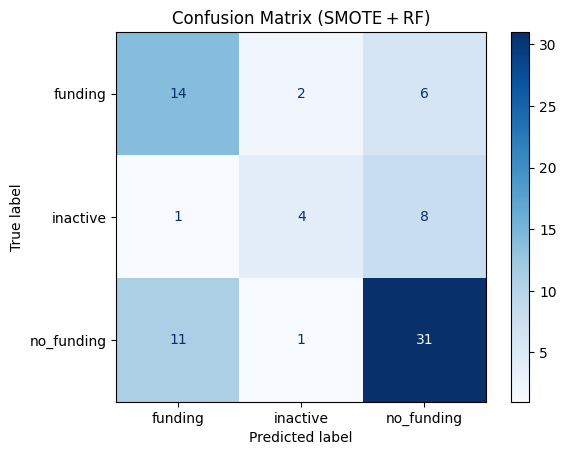


Top 15 feature importances:
                                          importance
bin__linkedin_valid                        0.199104
num__headline_non_financial_count          0.105303
num__description_word_count                0.095568
num__age                                   0.095542
num__description_founder_signal_score      0.071087
cat__business_model_B2C                    0.066831
cat__region_Vienna                         0.038929
num__description_jargon_density            0.038628
num__description_writing_score             0.037055
bin__x_valid                               0.034142
bin__instagram_valid                       0.032460
cat__category_Software & Analytics         0.029646
num__description_market_readiness_score    0.029283
num__description_numeric_evidence_count    0.020904
cat__category_Other                        0.019483


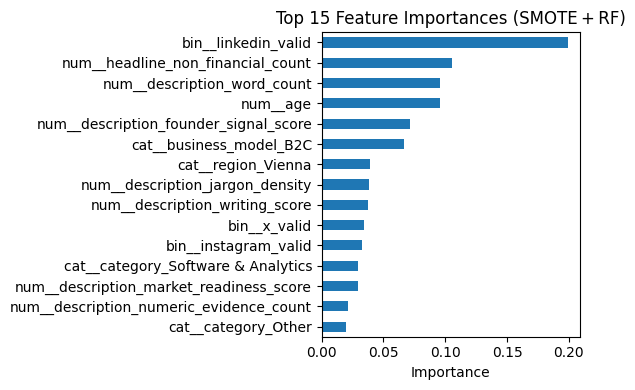

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    RandomizedSearchCV
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    ConfusionMatrixDisplay,
    make_scorer,
    f1_score
)

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# 1) Load data
df = pd.read_csv("./data_new/startups_final.csv")

# 2) Define features & target
numeric_features = [
    'age',
    'headline_non_financial_count',
    'description_writing_score',
    'description_market_readiness_score',
    'description_founder_signal_score',
    'description_word_count',
    'description_jargon_density',
    'description_numeric_evidence_count'
]
cat_features = ['region', 'category', 'business_model']
binary_flags = ['linkedin_valid', 'instagram_valid', 'x_valid']

X = df[numeric_features + cat_features + binary_flags]
y = df['status']

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 4) Preprocessor
numeric_transformer = SimpleImputer(strategy='median')
cat_transformer = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', cat_transformer,       cat_features),
    ('bin', 'passthrough',         binary_flags)
])

# 5) SMOTE + RF pipeline (no class_weight, since SMOTE balances)
imb_pipe = ImbPipeline([
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# 6) Hyperparameter search over the SMOTE pipeline
param_dist = {
    'rf__n_estimators':      [100, 300, 500],
    'rf__max_depth':         [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf':  [1, 2, 4],
    'rf__max_features':      ['sqrt', 'log2', 0.2, 0.5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_macro = make_scorer(f1_score, average='macro', zero_division=0)

search = RandomizedSearchCV(
    imb_pipe,
    param_distributions=param_dist,
    n_iter=20,
    cv=cv,
    scoring=f1_macro,
    n_jobs=-1,
    random_state=42,
    verbose=1,
    refit=True,
    error_score=0
)
search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("Best CV F1-macro:", np.round(search.best_score_, 3), "\n")

# 7) Evaluate on hold-out test set
best_pipe = search.best_estimator_
y_pred = best_pipe.predict(X_test)

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred, zero_division=0))

# 8) Confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=best_pipe.named_steps['rf'].classes_,
    cmap=plt.cm.Blues,
    normalize=None
)
plt.title("Confusion Matrix (SMOTE + RF)")
plt.show()

# 9) Feature importances
rf = best_pipe.named_steps['rf']
feature_names = best_pipe.named_steps['prep'].get_feature_names_out()
importances = pd.Series(rf.feature_importances_, index=feature_names)
top15 = importances.sort_values(ascending=False).head(15)

print("\nTop 15 feature importances:\n", top15.to_frame('importance'))
plt.figure(figsize=(6,4))
top15.sort_values().plot(kind='barh')
plt.title("Top 15 Feature Importances (SMOTE + RF)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


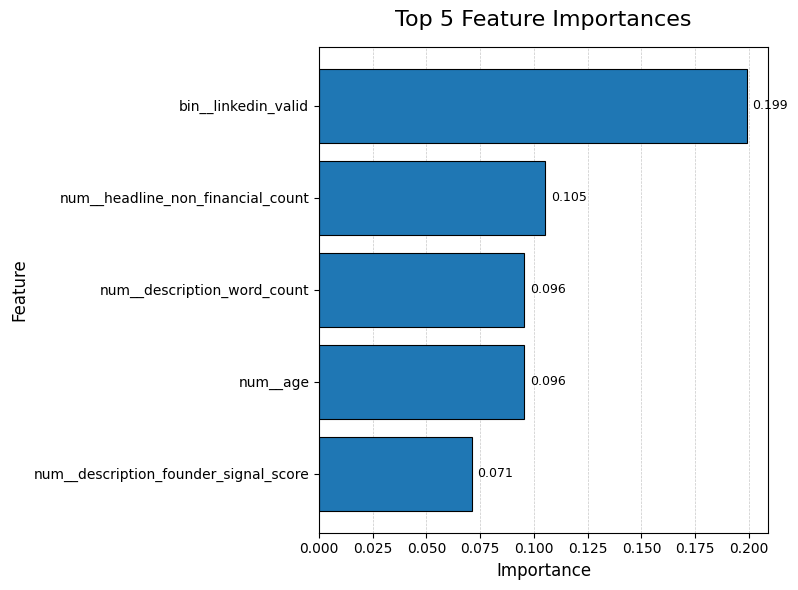

In [75]:
import matplotlib.pyplot as plt

top15 = importances.sort_values(ascending=False).head(5)

# Sort ascending for horizontal bars
data = top15.sort_values()

fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars
bars = ax.barh(
    data.index, 
    data.values, 
    edgecolor='black', 
    linewidth=0.8
)

# Annotate each bar with its value
ax.bar_label(bars, labels=[f"{v:.3f}" for v in data.values], padding=4, fontsize=9)

# Titles & labels
ax.set_title("Top 5 Feature Importances", fontsize=16, pad=15)
ax.set_xlabel("Importance", fontsize=12)
ax.set_ylabel("Feature", fontsize=12)

# Grid only on x-axis
ax.xaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)

# Improve tick label font sizes
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


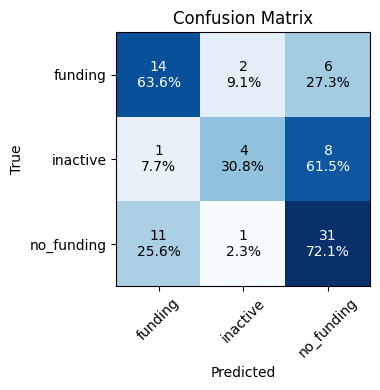

In [67]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=best_pipe.named_steps['rf'].classes_)
cm_perc = cm.astype('float') / cm.sum(axis=1)[:, None] * 100

fig, ax = plt.subplots(figsize=(4,4))
im = ax.imshow(cm_perc, cmap='Blues')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f"{cm[i,j]}\n{cm_perc[i,j]:.1f}%", 
                ha='center', va='center', color='white' if cm_perc[i,j]>50 else 'black')
ax.set_xticks(range(len(cm)))
ax.set_yticks(range(len(cm)))
ax.set_xticklabels(best_pipe.named_steps['rf'].classes_, rotation=45)
ax.set_yticklabels(best_pipe.named_steps['rf'].classes_)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


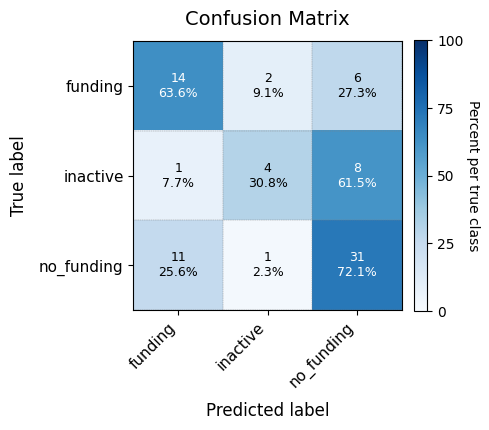

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute counts and percentages
labels = best_pipe.named_steps['rf'].classes_
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_perc = cm.astype(float) / cm.sum(axis=1)[:, None] * 100

fig, ax = plt.subplots(figsize=(5,5))

# Heatmap
cmap = plt.cm.Blues
im = ax.imshow(cm_perc, cmap=cmap, vmin=0, vmax=100)

# Colorbar
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Percent per true class', rotation=270, labelpad=12)
cbar.set_ticks(np.linspace(0, 100, 5))

# Annotations (count + %), lighter font
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        pct = cm_perc[i, j]
        cnt = cm[i, j]
        color = 'white' if pct > 60 else 'black'
        ax.text(
            j, i,
            f"{cnt}\n{pct:.1f}%",
            ha='center', va='center',
            color=color,
            fontsize=9,         # slightly smaller
            fontweight='normal' # no bold
        )

# Axis labels & ticks
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, fontsize=11, rotation=45, ha='right')
ax.set_yticklabels(labels, fontsize=11)
ax.set_xlabel('Predicted label', fontsize=12, labelpad=8)
ax.set_ylabel('True label', fontsize=12, labelpad=8)
ax.set_title('Confusion Matrix', fontsize=14, pad=12)

# Subtle gridlines
ax.set_xticks(np.arange(-.5, len(labels), 1), minor=True)
ax.set_yticks(np.arange(-.5, len(labels), 1), minor=True)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.3)
ax.tick_params(which='minor', bottom=False, left=False)

plt.tight_layout()
plt.show()



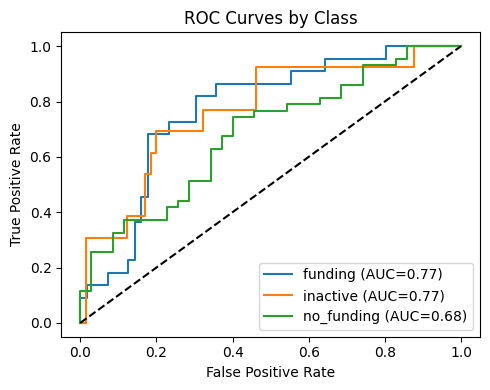

In [50]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_bin = label_binarize(y_test, classes=best_pipe.named_steps['rf'].classes_)
probs = best_pipe.predict_proba(X_test)

plt.figure(figsize=(5,4))
for i, cls in enumerate(best_pipe.named_steps['rf'].classes_):
    fpr, tpr, _ = roc_curve(y_bin[:, i], probs[:, i])
    plt.plot(fpr, tpr, label=f"{cls} (AUC={auc(fpr, tpr):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves by Class')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


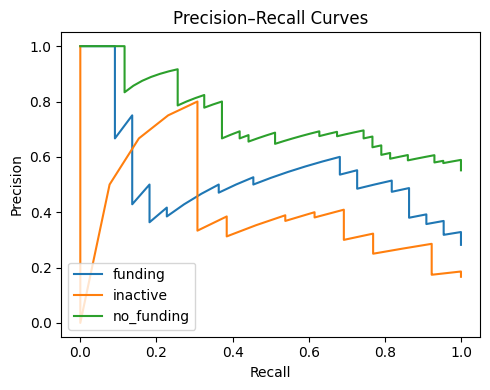

In [51]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(5,4))
for i, cls in enumerate(best_pipe.named_steps['rf'].classes_):
    prec, rec, _ = precision_recall_curve(y_bin[:, i], probs[:, i])
    plt.plot(rec, prec, label=cls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curves')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


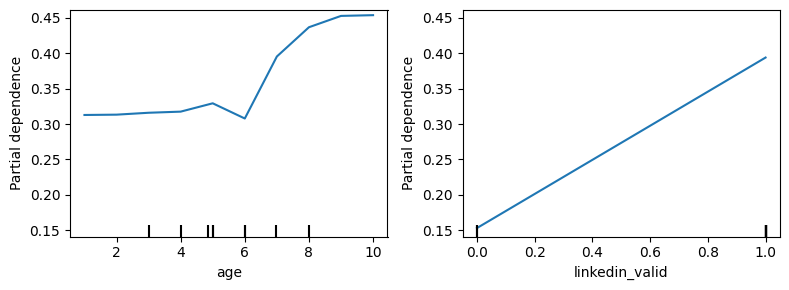

In [55]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(1, 2, figsize=(8,3))
PartialDependenceDisplay.from_estimator(
    best_pipe,
    X_test,
    features=['age', 'linkedin_valid'],
    target='funding',          # specify your class here
    ax=ax
)
plt.tight_layout()
plt.show()

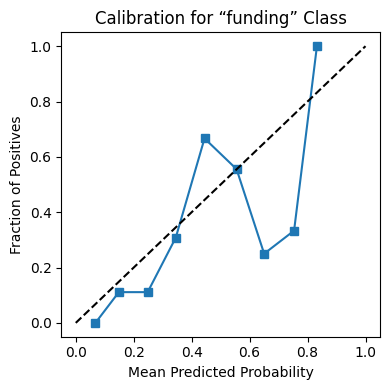

In [53]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(4,4))
prob_pos = probs[:, best_pipe.named_steps['rf'].classes_=='funding']  # example for “funding”
frac_true, frac_pred = calibration_curve((y_test=='funding').astype(int), prob_pos, n_bins=10)
plt.plot(frac_pred, frac_true, 's-')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration for “funding” Class')
plt.tight_layout()
plt.show()


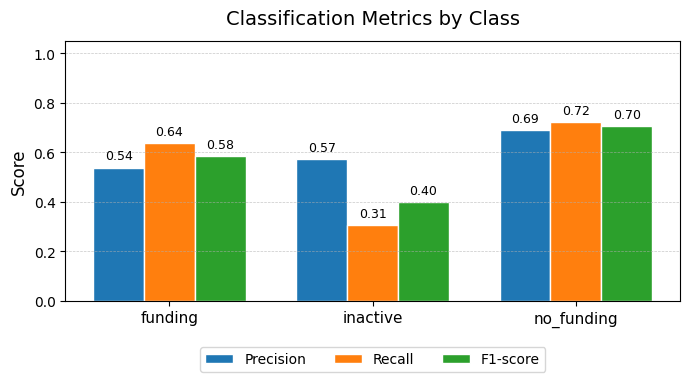

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Build the metrics DataFrame
report_dict = classification_report(
    y_test, y_pred,
    output_dict=True,
    zero_division=0
)
report_df = pd.DataFrame(report_dict).transpose()
metrics_df = report_df.loc[['funding','inactive','no_funding'],
                           ['precision','recall','f1-score']]

# Plot settings
classes = metrics_df.index.tolist()
metrics = metrics_df.columns.tolist()
n_classes = len(classes)
n_metrics = len(metrics)
x = np.arange(n_classes)     # the label locations
width = 0.25                  # width of each bar

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # blue, orange, green

fig, ax = plt.subplots(figsize=(7,4))

# Draw each metric's bars
for i, metric in enumerate(metrics):
    offsets = x + (i - 1) * width  # center them
    bars = ax.bar(
        offsets,
        metrics_df[metric],
        width,
        label=metric.capitalize(),
        color=colors[i],
        edgecolor='white'
    )
    # Annotate values
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.02,
            f"{height:.2f}",
            ha='center', va='bottom',
            fontsize=9
        )

# Axes and grid
ax.set_xticks(x)
ax.set_xticklabels(classes, fontsize=11)
ax.set_ylim(0, 1.05)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Classification Metrics by Class', fontsize=14, pad=12)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Legend
ax.legend(title='', fontsize=10, loc='upper center',
          bbox_to_anchor=(0.5, -0.15), ncol=n_metrics)

plt.tight_layout()
plt.show()



Top 10 features for class 'funding' (ΔF1 when permuted):
                                     ΔF1-importance
num__headline_non_financial_count          0.096327
bin__linkedin_valid                        0.077628
num__age                                   0.072247
cat__category_Professional Services        0.060369
cat__business_model_B2C                    0.031735


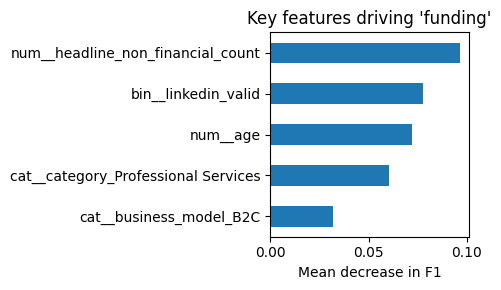


Top 10 features for class 'inactive' (ΔF1 when permuted):
                                    ΔF1-importance
bin__linkedin_valid                       0.255578
cat__category_Software & Analytics        0.060150
cat__region_Vienna                        0.056642
num__age                                  0.053780
num__description_writing_score            0.042652


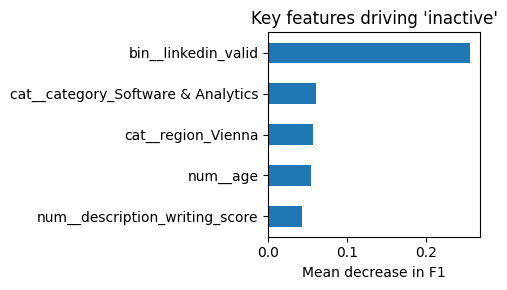


Top 10 features for class 'no_funding' (ΔF1 when permuted):
                                     ΔF1-importance
bin__linkedin_valid                        0.063437
num__age                                   0.053982
num__headline_non_financial_count          0.040619
cat__category_Professional Services        0.027382
num__description_jargon_density            0.022004


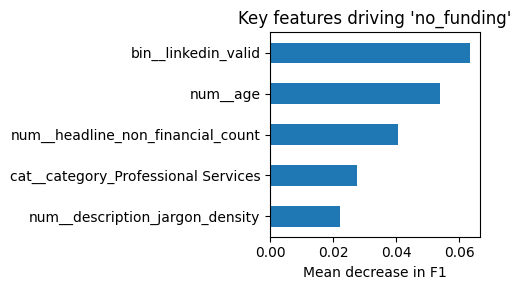

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# 1) Grab your SMOTE+RF pipeline’s steps
prep = best_pipe.named_steps['prep']
rf   = best_pipe.named_steps['rf']

# 2) Transform the test set once
X_test_trans = prep.transform(X_test)
classes = rf.classes_
feat_names = prep.get_feature_names_out()


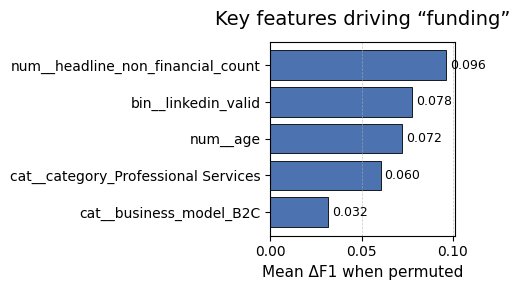

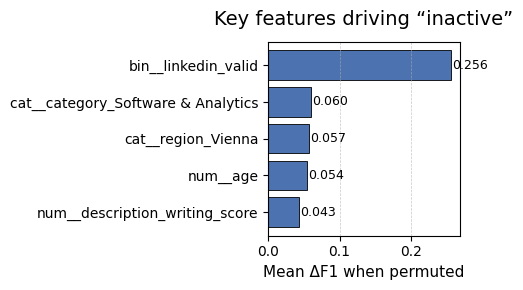

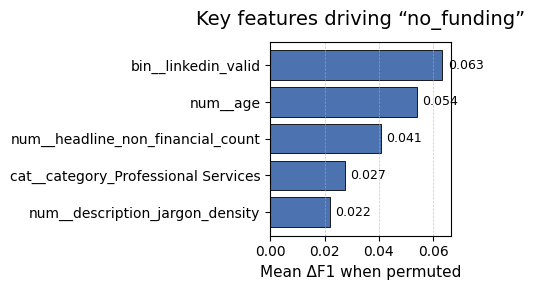

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# after computing `top10` for each cls:
for cls in classes:
    # compute perm importances as before…
    perm = permutation_importance(
        rf,
        X_test_trans,
        y_test,
        scoring=make_scorer(cls_f1, greater_is_better=True),
        n_repeats=10,
        random_state=42,
        n_jobs=-1
    )
    imp = pd.Series(perm.importances_mean, index=feat_names)
    top10 = imp.sort_values(ascending=False).head(5)
    
    # --- nice bar chart ---
    data = top10.sort_values()
    fig, ax = plt.subplots(figsize=(5,3))
    
    bars = ax.barh(
        data.index,
        data.values,
        color='#4C72B0',         # solid, slide-friendly blue
        edgecolor='black',
        linewidth=0.6
    )
    
    # annotate values
    for bar in bars:
        width = bar.get_width()
        ax.text(
            width + 0.002,        # slight offset to the right
            bar.get_y() + bar.get_height()/2,
            f"{width:.3f}",
            va='center',
            fontsize=9
        )
    
    # formatting
    ax.set_title(f"Key features driving “{cls}”", fontsize=14, pad=12)
    ax.set_xlabel("Mean ΔF1 when permuted", fontsize=11)
    ax.set_ylabel("")  # feature names already on y-axis
    ax.xaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()
    plt.show()



Distribution of region by status (%)
 status         funding  inactive  no_funding
region                                      
Burgenland         0.0       0.0         1.4
Carinthia          0.9       0.0         2.3
Lower Austria      9.0       4.8         3.3
Salzburg           0.9       1.6         2.8
Styria             7.2       8.1         7.4
Tyrol              3.6       1.6         5.6
Upper Austria     12.6      11.3        14.4
Vienna            64.9      71.0        60.5
Vorarlberg         0.9       1.6         2.3


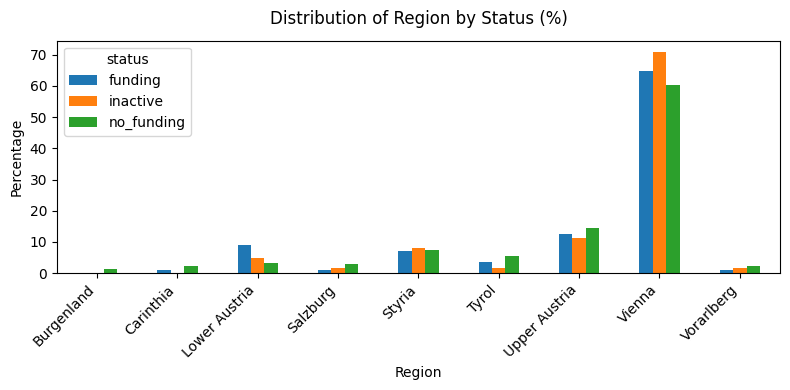


Distribution of category by status (%)
 status                           funding  inactive  no_funding
category                                                      
AgTech/FoodTech                      4.5       4.8         0.5
ClimateTech/GreenTech/CleanTech      0.0       0.0         0.5
ConstructionTech/Green Building      1.8       0.0         0.9
Education                            0.0       3.2         1.9
Energy                               2.7       0.0         0.9
FinTech/InsurTech                    5.4       9.7         5.1
Hardware                             3.6       1.6         2.3
Health                              15.3       6.5         9.8
Media & Entertainment                4.5       4.8         3.3
Mobility                             1.8       1.6         2.8
Other                                0.9       3.2         3.3
Professional Services                4.5      12.9        14.9
PropTech                             0.0       1.6         2.3
Recruitment   

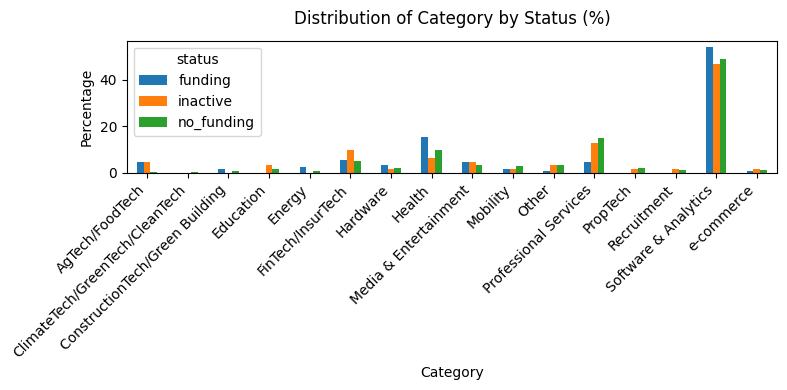


Distribution of business_model by status (%)
 status          funding  inactive  no_funding
business_model                               
B2B                73.0      45.2        63.3
B2B2C               4.5       4.8         3.3
B2C                18.9      38.7        25.6
marketplace         0.0       6.5         2.8
other               0.9       1.6         0.0
platform            2.7       3.2         5.1


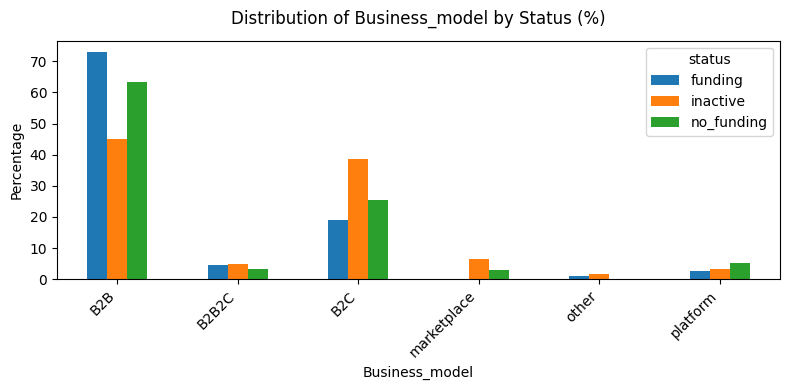


Mean of binary validity flags by status (%)
             linkedin_global_profile  linkedin_valid  instagram_valid  x_valid
status                                                                       
funding                         7.2            89.2             61.3     48.6
inactive                        0.0            35.5             50.0     37.1
no_funding                      2.8            69.8             61.9     32.1


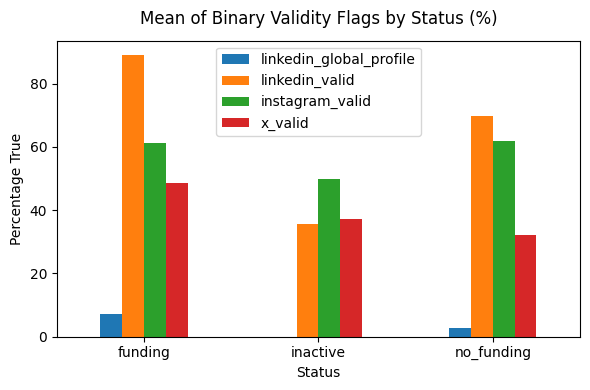

<Figure size 600x400 with 0 Axes>

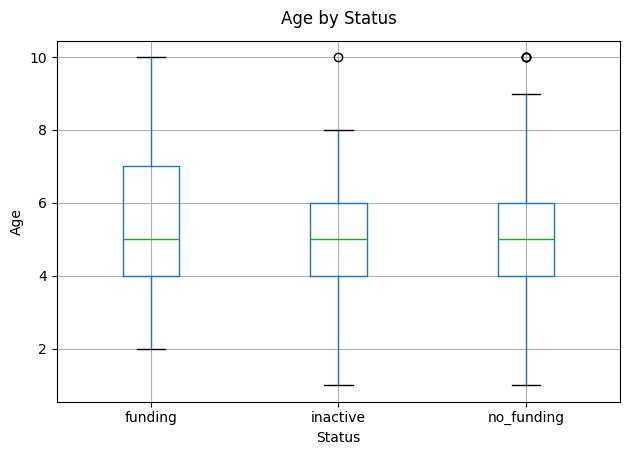

<Figure size 600x400 with 0 Axes>

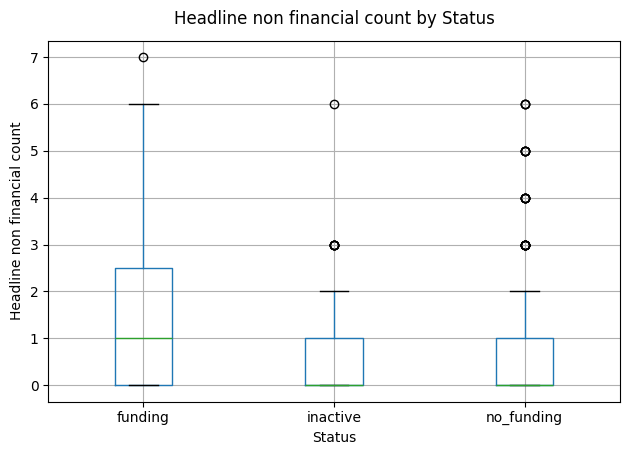


Mean of description_ variables by status
             description_writing_score  description_market_readiness_score  description_founder_signal_score  description_word_count  description_jargon_density  description_numeric_evidence_count
status                                                                                                                                                                                             
funding                          7.20                                5.79                              5.84                   84.59                        0.23                                0.34
inactive                         7.06                                5.60                              5.55                   84.48                        0.21                                0.18
no_funding                       7.09                                5.80                              5.64                  108.97                        0.22              

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load your data

# 2) Categorical variables: percentage distribution by status
categorical_vars = ['region', 'category', 'business_model']
for var in categorical_vars:
    ct = pd.crosstab(df[var], df['status'], normalize='columns') * 100
    print(f"\nDistribution of {var} by status (%)\n", ct.round(1))
    
    # bar chart
    ax = ct.plot(kind='bar', figsize=(8,4))
    ax.set_title(f'Distribution of {var.capitalize()} by Status (%)', pad=12)
    ax.set_ylabel('Percentage')
    ax.set_xlabel(var.capitalize())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 3) Binary flags: mean true rate by status
binary_vars = ['linkedin_global_profile', 'linkedin_valid', 'instagram_valid', 'x_valid']
bin_summary = df.groupby('status')[binary_vars].mean() * 100
print("\nMean of binary validity flags by status (%)\n", bin_summary.round(1))

ax = bin_summary.plot(kind='bar', figsize=(6,4))
ax.set_title('Mean of Binary Validity Flags by Status (%)', pad=12)
ax.set_ylabel('Percentage True')
ax.set_xlabel('Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4) Numerical variables: boxplots by status
numerical_vars = ['age', 'headline_non_financial_count']
for var in numerical_vars:
    plt.figure(figsize=(6,4))
    df.boxplot(column=var, by='status')
    plt.title(f'{var.replace("_", " ").capitalize()} by Status', pad=12)
    plt.suptitle('')  # remove default suptitle
    plt.ylabel(var.replace('_', ' ').capitalize())
    plt.xlabel('Status')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# 5) Description metrics: mean by status
desc_vars = [col for col in df.columns if col.startswith('description_')]
desc_summary = df.groupby('status')[desc_vars].mean()
print("\nMean of description_ variables by status\n", desc_summary.round(2))
